# Excercise 1: prepare and visualize data  
The first piece of work will consist on working with Land Cover data for 2000 and 2018 from the [ESA platform](http://maps.elie.ucl.ac.be/CCI/viewer/). This data has previously been uploaded to GEE for use.  
Additionally, the work here involves the Soil Organic Carbon (SOC) map layers from SoilsRevealed to calculate changes in SOC for the period 2000-2018.

## Load libraries

In [52]:
# Library Imports
import json

import ee
import geemap
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from ipyleaflet import DrawControl, TileLayer

In [2]:
# ee.Authenticate()
ee.Initialize()

## 1) Prepare and visualize the data

### 1.1) Calculate differences in SOC data  
Read the image colection from SoilsRevealed project and calculate the differences between the two time steps.

In [3]:
soc_stock_collection = ee.ImageCollection("projects/soils-revealed/Recent/SOC_stock_nov2020")

# Sort the collection by 'system:time_start' property in ascending order
sorted_collection = soc_stock_collection.sort("system:time_start")

# Select the first and last images in the sorted collection
first_image = sorted_collection.first()
last_image = sorted_collection.sort("system:time_start", False).first()

# Calculate the difference between the first and last images
soc_stock_change = last_image.subtract(first_image)

Prepare initial map visualization

In [4]:
color_ramp = [
    "#B30200",  # -10
    "#E34A33",  # -7.5
    "#FC8D59",  # -5
    "#FDCC8A",  # -2.5
    "#FFFFCC",  # 0
    "#A1DAB4",  # 2.5
    "#31B3BD",  # 5
    "#1C9099",  # 7.5
    "#066C59",  # 10
]
# Define the visualization parameters
vis_params = {"min": -10, "max": 10, "palette": color_ramp}

center = (66.7, 49.2)
zoom = 7  # Zoom level for the map
map_soc = geemap.Map(center=center, zoom=zoom, basemap="CartoDB.PositronNoLabels")

# Add the SOC stock change layer as a tile layer
soc_stock_change_tile = TileLayer(
    url=soc_stock_change.getMapId(vis_params)["tile_fetcher"].url_format,
    attribution="Google Earth Engine",
    name="SOC Stock Change",
    opacity=1.0,
)
map_soc.add_layer(soc_stock_change_tile)
map_soc

Map(center=[66.7, 49.2], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=…

### 1.2) Visualize Land Cover data  
Load and visualize the two Land Cover layers uploaded to GEE.

In [5]:
lc_2000 = ee.Image("projects/ee-angelarcones/assets/Land_Cover_2000")
lc_2018 = ee.Image("projects/ee-angelarcones/assets/Land_Cover_2018")

In [51]:
# Land Cover classes and colors
sld_ramp = """
<RasterSymbolizer>
  <ColorMap type="ramp" extended="false">
    <ColorMapEntry color="#5b5b18" quantity="10" label="Cropland rainfed" />
    <ColorMapEntry color="#7d7617" quantity="11" label="Cropland rainfed herbaceous" />
    <ColorMapEntry color="#124d00" quantity="12" label="Cropland rainfed tree or shrub" />
    <ColorMapEntry color="#a09113" quantity="20" label="Cropland irrigation or post-flood" />
    <ColorMapEntry color="#c0ab10" quantity="30" label="Mosaic cropland" />
    <ColorMapEntry color="#dfc30c" quantity="40" label="Mosaic natural vegetation" />
    <ColorMapEntry color="#136010" quantity="50" label="Tree broadleaved evergreen closed to open" />
    <ColorMapEntry color="#117221" quantity="60" label="Tree broadleaved decidious closed to open" />
    <ColorMapEntry color="#0b842f" quantity="61" label="Tree broadleaved decidious closed" />
    <ColorMapEntry color="#2a9339" quantity="62" label="Tree broadleaved decidious open" />
    <ColorMapEntry color="#4aa040" quantity="70" label="Tree needle evergreen closed to open" />
    <ColorMapEntry color="#91c357" quantity="80" label="Tree needle decidious closed to open" />
    <ColorMapEntry color="#a5ce5f" quantity="81" label="Tree needle decidious closed" />
    <ColorMapEntry color="#b9d867" quantity="82" label="Tree needle decidious open" />
    <ColorMapEntry color="#cce36f" quantity="90" label="Tree mixed" />
    <ColorMapEntry color="#e0ed78" quantity="100" label="Mosaic tree and shrubland" />
    <ColorMapEntry color="#967216" quantity="110" label="Mosaic herbaceous" />
    <ColorMapEntry color="#a67d1a" quantity="120" label="Shrubland" />
    <ColorMapEntry color="#b6881f" quantity="121" label="Shrubland evergreen" />
    <ColorMapEntry color="#c69323" quantity="122" label="Shrubland decidious" />
    <ColorMapEntry color="#d69e27" quantity="130" label="Grassland" />
    <ColorMapEntry color="#e6a82b" quantity="140" label="Lichens and mosses" />
    <ColorMapEntry color="#f6b148" quantity="150" label="Sparse vegetation" />
    <ColorMapEntry color="#febc7a" quantity="151" label="Sparse tree" />
    <ColorMapEntry color="#ffcaaa" quantity="152" label="Sparse shrub" />
    <ColorMapEntry color="#f8dcd3" quantity="153" label="Sparse herbaceous" />
    <ColorMapEntry color="#016a6d" quantity="160" label="Tree cover flooded fresh or brackish water" />
    <ColorMapEntry color="#42ded5" quantity="170" label="Tree cover flooded saline water" />
    <ColorMapEntry color="#35adad" quantity="180" label="Shrub or herb cover flood" />
    <ColorMapEntry color="#3640b7" quantity="190" label="Urban" />
    <ColorMapEntry color="#df704f" quantity="200" label="Bare areas" />
    <ColorMapEntry color="#c54802" quantity="201" label="Bare areas consolidated" />
    <ColorMapEntry color="#fd9ca7" quantity="202" label="Bare areas unconsolidated" />
    <ColorMapEntry color="#48a7ff" quantity="210" label="Water bodies" />
    <ColorMapEntry color="#b9eeef" quantity="220" label="Snow and ice" />
  </ColorMap>
</RasterSymbolizer>
"""  # noqa: E501

In [7]:
center = (38, -0.8)  # Southeast of Spain
zoom = 10
map_lc = geemap.Map(center=center, zoom=zoom, basemap="CartoDB.PositronNoLabels")


lc_2000_tile = TileLayer(
    url=lc_2000.sldStyle(sld_ramp).getMapId()["tile_fetcher"].url_format,
    attribution="Google Earth Engine",
    name="Landcover 2000",
    opacity=1.0,
)
map_lc.add_layer(lc_2000_tile)

lc_2018_tile = TileLayer(
    url=lc_2018.sldStyle(sld_ramp).getMapId()["tile_fetcher"].url_format,
    attribution="Google Earth Engine",
    name="Landcover 2018",
    opacity=1.0,
)
map_lc.add_layer(lc_2018_tile)

map_lc

Map(center=[38, -0.8], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

## 2) Draw area and extract data

In [8]:
# Prepare map and load layers
center = (38, -0.8)
zoom = 10
m = geemap.Map(center=center, zoom=zoom, basemap="CartoDB.PositronNoLabels")
m.add_layer(soc_stock_change_tile)
m.add_layer(lc_2000_tile)
m.add_layer(lc_2018_tile)

In [9]:
## Add a drawing control to the map
polygon_style = {"color": "black", "weight": 4, "fillOpacity": 0}
rectangle_style = {"color": "red", "weight": 4, "fillOpacity": 0}

draw_control = DrawControl(
    polygon={"shapeOptions": polygon_style},
    rectangle={"shapeOptions": rectangle_style},
    edit=False,
    remove=True,
    draw={"polygon": {"allowIntersection": False}},
)
m.add_control(draw_control)


# List to store the drawn geometries as GeoJSON objects
drawn_geometries = []

# Function to handle drawing events


def handle_draw(event, action, geo_json):
    if action == "created":
        drawn_geometries.append(geo_json)
    elif action == "deleted":
        for drawn_geometry in drawn_geometries:
            if drawn_geometry["id"] == event["id"]:
                drawn_geometries.remove(drawn_geometry)

    # Save the drawn geometries as a GeoJSON file
    with open("../data/raw/drawn_geometries.geojson", "w") as f:
        json.dump(drawn_geometries, f)


# Bind the drawing event to the handle_draw function
draw_control.on_draw(handle_draw)

m

Map(center=[38, -0.8], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [15]:
# Check the info of the drawn geometries
geometry_collection = ee.FeatureCollection(ee.FeatureCollection(drawn_geometries))
geometry_collection.getInfo()

{'type': 'FeatureCollection',
 'columns': {'style': 'Dictionary<Object>', 'system:index': 'String'},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-1.083527, 37.817378],
      [-0.769043, 37.817378],
      [-0.769043, 37.957192],
      [-1.083527, 37.957192],
      [-1.083527, 37.817378]]]},
   'id': '0',
   'properties': {'style': {'clickable': True,
     'color': 'red',
     'fill': True,
     'fillColor': None,
     'fillOpacity': 0,
     'opacity': 0.5,
     'stroke': True,
     'weight': 4}}}]}

Extract and plot area based on the drawn geometry

In [17]:
lc_2018_aoi = lc_2018.clip(geometry_collection)
m_aoi = geemap.Map(center=center, zoom=zoom, basemap="CartoDB.PositronNoLabels")
aoi_tile = TileLayer(
    url=lc_2018_aoi.sldStyle(sld_ramp).getMapId()["tile_fetcher"].url_format,
    attribution="Google Earth Engine",
    name="Landcover 2018",
    opacity=1.0,
)
m_aoi.add_layer(aoi_tile)
m_aoi

Map(center=[38, -0.8], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

### 2.2) Visualized the data by class

In [18]:
# Dictionary to store land cover class names and colors
landcover_info = {
    "10": {"Landcover": "Cropland rainfed", "Color": "#5b5b18"},
    "11": {"Landcover": "Cropland rainfed herbaceous", "Color": "#7d7617"},
    "12": {"Landcover": "Cropland rainfed tree or shrub", "Color": "#124d00"},
    "20": {"Landcover": "Cropland irrigation or post-flood", "Color": "#a09113"},
    "30": {"Landcover": "Mosaic cropland", "Color": "#c0ab10"},
    "40": {"Landcover": "Mosaic natural vegetation", "Color": "#dfc30c"},
    "50": {"Landcover": "Tree broadleaved evergreen closed to open", "Color": "#136010"},
    "60": {"Landcover": "Tree broadleaved deciduous closed to open", "Color": "#117221"},
    "61": {"Landcover": "Tree broadleaved deciduous closed", "Color": "#0b842f"},
    "62": {"Landcover": "Tree broadleaved deciduous open", "Color": "#2a9339"},
    "70": {"Landcover": "Tree needle evergreen closed to open", "Color": "#4aa040"},
    "80": {"Landcover": "Tree needle deciduous closed to open", "Color": "#91c357"},
    "81": {"Landcover": "Tree needle deciduous closed", "Color": "#a5ce5f"},
    "82": {"Landcover": "Tree needle deciduous open", "Color": "#b9d867"},
    "90": {"Landcover": "Tree mixed", "Color": "#cce36f"},
    "100": {"Landcover": "Mosaic tree and shrubland", "Color": "#e0ed78"},
    "110": {"Landcover": "Mosaic herbaceous", "Color": "#967216"},
    "120": {"Landcover": "Shrubland", "Color": "#a67d1a"},
    "121": {"Landcover": "Shrubland evergreen", "Color": "#b6881f"},
    "122": {"Landcover": "Shrubland deciduous", "Color": "#c69323"},
    "130": {"Landcover": "Grassland", "Color": "#d69e27"},
    "140": {"Landcover": "Lichens and mosses", "Color": "#e6a82b"},
    "150": {"Landcover": "Sparse vegetation", "Color": "#f6b148"},
    "151": {"Landcover": "Sparse tree", "Color": "#febc7a"},
    "152": {"Landcover": "Sparse shrub", "Color": "#ffcaaa"},
    "153": {"Landcover": "Sparse herbaceous", "Color": "#f8dcd3"},
    "160": {"Landcover": "Tree cover flooded fresh or brackish water", "Color": "#016a6d"},
    "170": {"Landcover": "Tree cover flooded saline water", "Color": "#42ded5"},
    "180": {"Landcover": "Shrub or herb cover flood", "Color": "#35adad"},
    "190": {"Landcover": "Urban", "Color": "#3640b7"},
    "200": {"Landcover": "Bare areas", "Color": "#df704f"},
    "201": {"Landcover": "Bare areas consolidated", "Color": "#c54802"},
    "202": {"Landcover": "Bare areas unconsolidated", "Color": "#fd9ca7"},
    "210": {"Landcover": "Water bodies", "Color": "#48a7ff"},
    "220": {"Landcover": "Snow and ice", "Color": "#b9eeef"},
}


# Create a DataFrame to store the land cover class information
landcover_df = pd.DataFrame.from_dict(landcover_info, orient="index")
landcover_df.index.name = "class"
landcover_df.reset_index(inplace=True)
landcover_df.head()

,class,Landcover,Color
0,10,Cropland rainfed,#5b5b18
1,11,Cropland rainfed herbaceous,#7d7617
2,12,Cropland rainfed tree or shrub,#124d00
3,20,Cropland irrigation or post-flood,#a09113
4,30,Mosaic cropland,#c0ab10


Compute the count and percentage of pixels for each class

In [19]:
lc_histogram = lc_2018_aoi.reduceRegion(
    reducer=ee.Reducer.frequencyHistogram(),
    geometry=geometry_collection.geometry(),  # Use the custom geometry as AOI
    scale=30,  # Resolution in meters
)

# Get the landcover class values and their respective counts
lc_counts = lc_histogram.get("b1").getInfo()

# Calculate the total count of land cover classes
total_count = sum(lc_counts.values())
print(f"Total count: {round(total_count, 0)}")
lc_counts_df = pd.DataFrame(lc_counts.items(), columns=["class", "count"])
lc_counts_df["percentage"] = lc_counts_df["count"] / total_count * 100
lc_counts_df = pd.merge(lc_counts_df, landcover_df, on="class", how="left")
lc_counts_df

Total count: 605103.0


,class,count,percentage,Landcover,Color
0,10,73861.650980,12.206454,Cropland rainfed,#5b5b18
1,100,45567.901961,7.530600,Mosaic tree and shrubland,#e0ed78
2,11,3394.117647,0.560915,Cropland rainfed herbaceous,#7d7617
3,12,202681.678431,33.495388,Cropland rainfed tree or shrub,#124d00
4,120,1361.000000,0.224920,Shrubland,#a67d1a
5,122,651.000000,0.107585,Shrubland deciduous,#c69323
6,130,43450.070588,7.180605,Grassland,#d69e27
7,150,2222.000000,0.367210,Sparse vegetation,#f6b148
8,153,89020.607843,14.711640,Sparse herbaceous,#f8dcd3
9,190,26043.749020,4.304017,Urban,#3640b7


### 2.3a) Visualize the data with Matplotlib

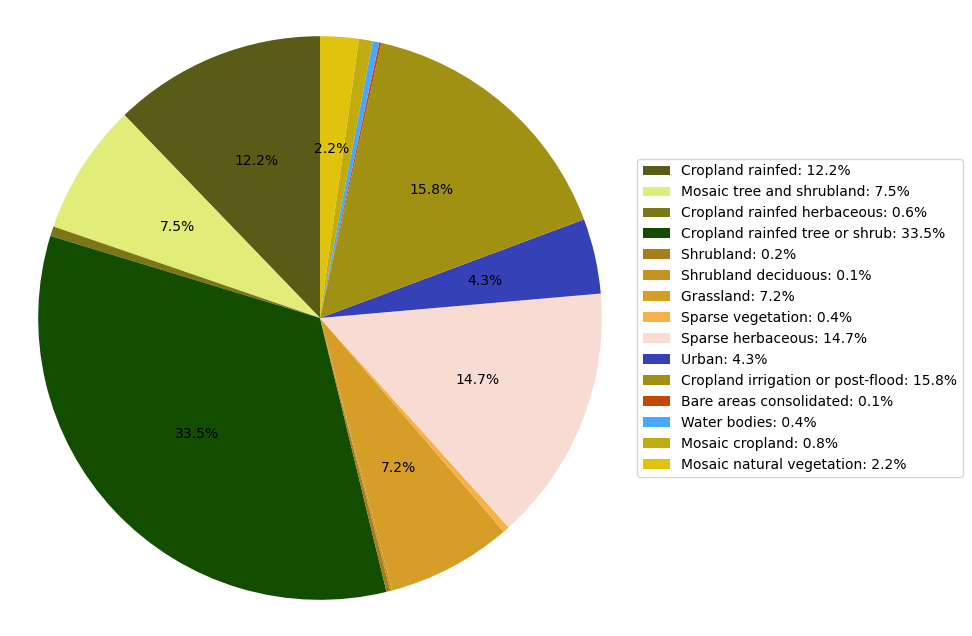

In [21]:
threshold = 2  # Hide labels for slices below 2%

fig, ax = plt.subplots(figsize=(8, 8))
wedges, _, autotexts = ax.pie(
    lc_counts_df["percentage"],
    labels=[""] * len(lc_counts_df["Landcover"]),
    colors=lc_counts_df["Color"],
    autopct=lambda pct: f"{pct:.1f}%" if pct > threshold else "",
    startangle=90,
    textprops={"color": "k"},
)  # Set labels to empty
ax.axis("equal")

# Create the legend labels with both category name and percentage
legend_labels = [
    f"{label}: {pct:.1f}%"
    for label, pct in zip(lc_counts_df["Landcover"], lc_counts_df["percentage"])
]
ax.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Adjust the label font size for better readability
for autotext in autotexts:
    autotext.set_fontsize(10)

plt.show()

### 2.3b) Interactive bar plot with plotly

Filter and order the dataframe

In [46]:
threshold = 2
df_thres = lc_counts_df[lc_counts_df["percentage"] > threshold]
df_thres = df_thres.sort_values(by="percentage", ascending=False)
df_thres["Color"] = df_thres["Color"].str.upper()
df_thres

,class,count,percentage,Landcover,Color
3,12,202681.678431,33.495388,Cropland rainfed tree or shrub,#124D00
10,20,95709.843137,15.817110,Cropland irrigation or post-flood,#A09113
8,153,89020.607843,14.711640,Sparse herbaceous,#F8DCD3
0,10,73861.650980,12.206454,Cropland rainfed,#5B5B18
1,100,45567.901961,7.530600,Mosaic tree and shrubland,#E0ED78
6,130,43450.070588,7.180605,Grassland,#D69E27
9,190,26043.749020,4.304017,Urban,#3640B7
14,40,13337.603922,2.204187,Mosaic natural vegetation,#DFC30C


Generate plot

In [50]:
fig = px.bar(
    df_thres,
    x="Landcover",
    y="percentage",
    color="Landcover",
    text="percentage",
    title="Distribution of main Landcover classes in the AOI",
    labels={"percentage": "Percentage", "Landcover": "Landcover class"},
    hover_data={
        "Landcover": True,
        "percentage": ":.2f%",
        "count": True,
        "Color": False,
    },  # To Fix: decimal positions
    color_discrete_map=dict(zip(df_thres["Landcover"], df_thres["Color"])),
)  # Get colors from hex values

fig.update_traces(
    texttemplate="%{text:.2s}%", textposition="outside"
)  # Add percentage values to the bars

fig.update_layout(yaxis_title="Percentage", showlegend=False, height=500, width=800)
fig.update_yaxes(
    range=[0, df_thres["percentage"].max() + 5]
)  # Get some extra space on top of the bars

fig.show()